# **Introduction to Image Processing**

Mojdeh Rastgoo - Desire Sidibe

In [73]:
%matplotlib inline
%pprint off

from __future__ import print_function, division
from matplotlib import cm
import numpy as np
import matplotlib.pyplot as plt

from skimage import img_as_ubyte
from skimage.color import rgb2gray
from skimage import io 
from skimage.transform import rescale



Pretty printing has been turned OFF


ImportError: cannot import name otsu

## 5.1 Morphological operations 

**Q.1** Using morphological operations functions build in skimage [`morphology module`](http://scikit-image.org/docs/dev/api/skimage.morphology.html) and structuring element of [`disk`](http://scikit-image.org/docs/dev/api/skimage.morphology.html#skimage.morphology.disk) apply **erosion, dilation, opening and closing** morphological operations on `FindingContours.png` image, using disk ratio of $r \in [1, 10, 20]$

**Note** use io.imshow to show the image rather than plt.

** Q.1.1 Erosion**

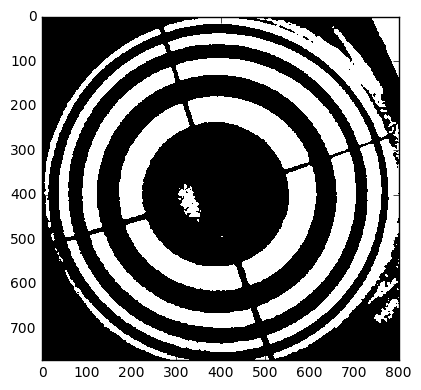

In [31]:
# Reading the image 
img_path = './images/'
FindingContours_im = io.imread(img_path.__add__('FindingContours.png'))
io.imshow(FindingContours_im)


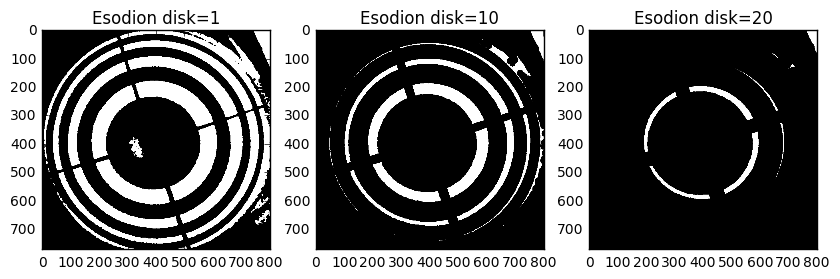

In [48]:
from skimage.morphology import disk
from skimage.morphology import erosion
# Applying erosion 
Erode1= erosion(FindingContours_im, disk(1))
Erode10= erosion(FindingContours_im, disk(10))
Erode20= erosion(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the lena image and its histogram 
ax0.imshow(Erode1,cmap=cm.Greys_r)
ax0.set_title('Esodion disk=1') 
ax1.imshow(Erode10,cmap=cm.Greys_r)
ax1.set_title('Esodion disk=10')
ax2.imshow(Erode20,cmap=cm.Greys_r)
ax2.set_title('Esodion disk=20')


** Q.1.2 Dilation **

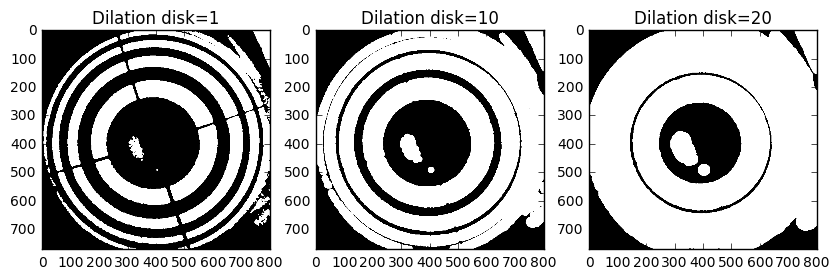

In [49]:
from skimage.morphology import dilation
# Applying Dilation
Dilate1= dilation(FindingContours_im, disk(1))
Dilate10= dilation(FindingContours_im, disk(10))
Dilate20= dilation(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the  images 
ax0.imshow(Dilate1,cmap=cm.Greys_r)
ax0.set_title('Dilation disk=1') 
ax1.imshow(Dilate10,cmap=cm.Greys_r)
ax1.set_title('Dilation disk=10')
ax2.imshow(Dilate20,cmap=cm.Greys_r)
ax2.set_title('Dilation disk=20')



** Q.1.3 Opening **

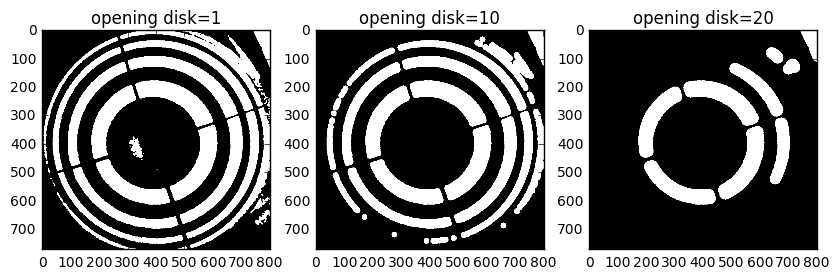

In [50]:
from skimage.morphology import opening
# Applying opening
open1= opening(FindingContours_im, disk(1))
open10= opening(FindingContours_im, disk(10))
open20= opening(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the  images 
ax0.imshow(open1,cmap=cm.Greys_r)
ax0.set_title('opening disk=1') 
ax1.imshow(open10,cmap=cm.Greys_r)
ax1.set_title('opening disk=10')
ax2.imshow(open20,cmap=cm.Greys_r)
ax2.set_title('opening disk=20')


** Q.1.4 Closing**

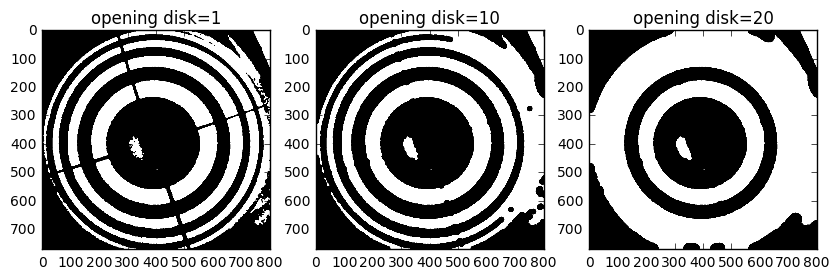

In [51]:
from skimage.morphology import closing
# Applying closing
close1= closing(FindingContours_im, disk(1))
close10= closing(FindingContours_im, disk(10))
close20= closing(FindingContours_im, disk(20))

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(10, 10))
ax0, ax1, ax2 = axes.ravel()

# Show the  images 
ax0.imshow(close1,cmap=cm.Greys_r)
ax0.set_title('opening disk=1') 
ax1.imshow(close10,cmap=cm.Greys_r)
ax1.set_title('opening disk=10')
ax2.imshow(close20,cmap=cm.Greys_r)
ax2.set_title('opening disk=20')

** Q.2 ** Explain what is the difference between erosion, dilation, opening and closing ? 

## 5.2 segmentation

### 5.2.1  Segmentation of toy example

In this exercise, you will have to automatically find how many type of coins are present on the picture `coins.jpg`.
Therefore: 

**1-** read the image as `ubyte` and display it. In order to speed-up the subsequent processes, divide the scale of the image by a factor of 4.

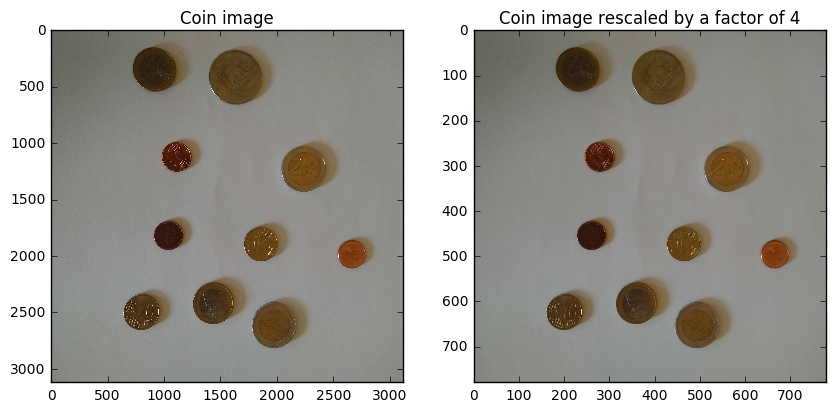

In [66]:
#Reading the coin image
Coin_im = img_as_ubyte(io.imread(img_path.__add__('coins.jpg')))

# Reading the image as ubyte and divide the scale of the image by a factor of 4
Coin_rescaled = rescale(Coin_im,0.25)

# Subplot the all the images
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 10))
ax0, ax1 = axes.ravel()

# Show the  images 
ax0.imshow(Coin_im,cmap=cm.Greys_r)
ax0.set_title('Coin image') 
ax1.imshow(Coin_rescaled,cmap=cm.Greys_r)
ax1.set_title('Coin image rescaled by a factor of 4')


**2-** Threshold the image using a global Otsu's thresholding (check `skimage.filters`) after converting the image into gray scale. Display the thresholded image.

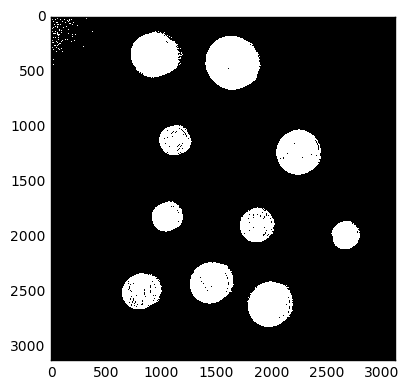

In [84]:
from skimage import filters
from skimage.filters import threshold_otsu
#Convert the image in gray scale 
Coin_grey = rgb2gray(Coin_im)

#Apply Otsu's thresolding 
threshold_otsu = threshold_otsu(Coin_grey,255)
Coin_threshold  = Coin_grey <= threshold_otsu

#display the binary image 
io.imshow(global_otsu)

**3-** Clean the  thresholded image using some morphological operations, i.e. erosion, dilation, opening, closing ...

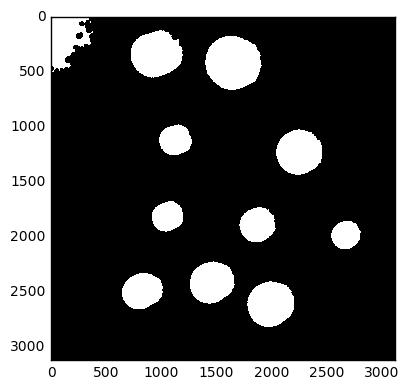

In [92]:
# Applying opening on the thresholded image
clean1= closing(Coin_threshold , disk(20))
clean2= opening(Coin_threshold , disk(1))

io.imshow(clean1)



**4-** Using the functions [`label`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.label) and [`regionprops`](http://scikit-image.org/docs/stable/api/skimage.measure.html#skimage.measure.regionprops) determine, the radius of each region and determine the number of type of coins in the image.

1. Show the image with the different labels.
1. How many regions do you find?
1. Display the radius of each region. Draw the corresponding circle on the image using `circle_perimeter` from `skimage.draw`


### 5.2.2 Segmentation of markers

**Q.3** Considering the techniques you used in the previous exercise, try to segment different objects in `objets4.jpg` image.

Using segmentation find the number of each object in the image. 

Considering that this is not as straight forward as the previous example, come up with your creative solutions and in case of failar explain the reasons and problems. 

In [ ]:
ObjectO